# Week 8-1.Text Analysis Using NLTK & KoNLPy

# 1.NLTK를 이용한 영문 분석

Colab에서 NLTK 를 사용하기 위해서는 다음의 명령어를 통해 필요한 패키지와 모듈을 다운로드한다.

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('gutenberg')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Unzipping corpora/gutenberg.zip.


True

## 1.1 Reading Sample Data

In [ ]:
from nltk.corpus import gutenberg
gutenberg_files = gutenberg.fileids()
gutenberg_files

['austen-emma.txt',
 'austen-persuasion.txt',
 'austen-sense.txt',
 'bible-kjv.txt',
 'blake-poems.txt',
 'bryant-stories.txt',
 'burgess-busterbrown.txt',
 'carroll-alice.txt',
 'chesterton-ball.txt',
 'chesterton-brown.txt',
 'chesterton-thursday.txt',
 'edgeworth-parents.txt',
 'melville-moby_dick.txt',
 'milton-paradise.txt',
 'shakespeare-caesar.txt',
 'shakespeare-hamlet.txt',
 'shakespeare-macbeth.txt',
 'whitman-leaves.txt']

In [ ]:
gutenberg_doc = gutenberg.open('austen-emma.txt').read()
gutenberg_doc

'[Emma by Jane Austen 1816]\n\nVOLUME I\n\nCHAPTER I\n\n\nEmma Woodhouse, handsome, clever, and rich, with a comfortable home\nand happy disposition, seemed to unite some of the best blessings\nof existence; and had lived nearly twenty-one years in the world\nwith very little to distress or vex her.\n\nShe was the youngest of the two daughters of a most affectionate,\nindulgent father; and had, in consequence of her sister\'s marriage,\nbeen mistress of his house from a very early period.  Her mother\nhad died too long ago for her to have more than an indistinct\nremembrance of her caresses; and her place had been supplied\nby an excellent woman as governess, who had fallen little short\nof a mother in affection.\n\nSixteen years had Miss Taylor been in Mr. Woodhouse\'s family,\nless as a governess than a friend, very fond of both daughters,\nbut particularly of Emma.  Between _them_ it was more the intimacy\nof sisters.  Even before Miss Taylor had ceased to hold the nominal\noffice o

## 1.2 Tokenize the Text

토크나이제이션의 사례 (Example from http://www.nltk.org)

In [ ]:
sentence = """At eight o'clock on Thursday morning
... Arthur didn't feel very good."""
tokens = nltk.word_tokenize(sentence)
tokens

['At',
 'eight',
 "o'clock",
 'on',
 'Thursday',
 'morning',
 'Arthur',
 'did',
 "n't",
 'feel',
 'very',
 'good',
 '.']

태깅

In [ ]:
tagged = nltk.pos_tag(tokens)
tagged

[('At', 'IN'),
 ('eight', 'CD'),
 ("o'clock", 'NN'),
 ('on', 'IN'),
 ('Thursday', 'NNP'),
 ('morning', 'NN'),
 ('Arthur', 'NNP'),
 ('did', 'VBD'),
 ("n't", 'RB'),
 ('feel', 'VB'),
 ('very', 'RB'),
 ('good', 'JJ'),
 ('.', '.')]

### Alphabetical list of part-of-speech tags used in the Penn Treebank Project:
https://www.cis.upenn.edu/~treebank/

```
CC Coordinating conjunction
CD Cardinal number
DT Determiner
EX Existential there
FW Foreign word
IN Preposition or subordinating conjunction
JJ Adjective
JJR Adjective, comparative
JJS Adjective, superlative
LS List item marker
MD Modal
NN Noun, singular or mass
NNS Noun, plural
NNP Proper noun, singular
NNPS Proper noun, plural
PDT Predeterminer
POS Possessive ending
PRP Personal pronoun
PRP$ Possessive pronoun
RB Adverb
RBR Adverb, comparative
RBS Adverb, superlative
RP Particle
SYM Symbol
TO to
UH Interjection
VB Verb, base form
VBD Verb, past tense
VBG Verb, gerund or present participle
VBN Verb, past participle
VBP Verb, non­3rd person singular present
VBZ Verb, 3rd person singular present
WDT Wh­determiner
WP Wh­pronoun
WP$ Possessive wh­pronoun
WRB Wh­adverb
```

In [ ]:
gutenberg_tokens = nltk.word_tokenize(gutenberg_doc)
gutenberg_tagged = nltk.pos_tag(gutenberg_tokens)

In [ ]:
gutenberg_tokens

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessings',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'years',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'was',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughters',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistin

In [ ]:
gutenberg_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessings', 'NNS'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'CD'),
 ('years', 'NNS'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.')

## 1.3 Stemming (or lemmatizing) the Words

단어의 기본형을 추출하기 위해 stemming(어근) (and/or) lemmatizing(표제어) 작업을 수행한다.
* NLTK는 stemming과 lemmatizing을 제공하는데, stemming보다는 lemmatazing이 보다 원하는 결과를 얻을 수 있다.
https://en.wikipedia.org/wiki/Lemmatisation#Description

**Lemmatisation** is closely related to **stemming**. The difference is that a stemmer operates on a single word without knowledge of the context, and therefore cannot discriminate between words which have different meanings depending on part of speech. However, stemmers are typically easier to implement and run faster, and the reduced accuracy may not matter for some applications.

For instance:

1. The word "better" has "good" as its lemma. This link is missed by stemming, as it requires a dictionary look-up.
2. The word "walk" is the base form for word "walking", and hence this is matched in both stemming and lemmatisation.
3. The word "meeting" can be either the base form of a noun or a form of a verb ("to meet") depending on the context, e.g., "in our last meeting" or "We are meeting again tomorrow". Unlike stemming, lemmatisation can in principle select the appropriate lemma depending on the context.

일반적으로 둘 중 하나만 수행하는 경우가 많은데, 두 작업을 동시에 수행하기도 한다.

### Lemmatization

In [ ]:
lemma = nltk.wordnet.WordNetLemmatizer()
gutenberg_lemma = []
for token in gutenberg_tokens:
    gutenberg_lemma.append(lemma.lemmatize(token))

gutenberg_lemma

['[',
 'Emma',
 'by',
 'Jane',
 'Austen',
 '1816',
 ']',
 'VOLUME',
 'I',
 'CHAPTER',
 'I',
 'Emma',
 'Woodhouse',
 ',',
 'handsome',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfortable',
 'home',
 'and',
 'happy',
 'disposition',
 ',',
 'seemed',
 'to',
 'unite',
 'some',
 'of',
 'the',
 'best',
 'blessing',
 'of',
 'existence',
 ';',
 'and',
 'had',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'in',
 'the',
 'world',
 'with',
 'very',
 'little',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'She',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affectionate',
 ',',
 'indulgent',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequence',
 'of',
 'her',
 'sister',
 "'s",
 'marriage',
 ',',
 'been',
 'mistress',
 'of',
 'his',
 'house',
 'from',
 'a',
 'very',
 'early',
 'period',
 '.',
 'Her',
 'mother',
 'had',
 'died',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',

In [ ]:
gutenberg_lemma_tagged = nltk.pos_tag(gutenberg_lemma)
gutenberg_lemma_tagged

[('[', 'NNS'),
 ('Emma', 'NNP'),
 ('by', 'IN'),
 ('Jane', 'NNP'),
 ('Austen', 'NNP'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('VOLUME', 'NNP'),
 ('I', 'PRP'),
 ('CHAPTER', 'VBP'),
 ('I', 'PRP'),
 ('Emma', 'NNP'),
 ('Woodhouse', 'NNP'),
 (',', ','),
 ('handsome', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfortable', 'JJ'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happy', 'JJ'),
 ('disposition', 'NN'),
 (',', ','),
 ('seemed', 'VBD'),
 ('to', 'TO'),
 ('unite', 'VB'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('blessing', 'NN'),
 ('of', 'IN'),
 ('existence', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('lived', 'VBN'),
 ('nearly', 'RB'),
 ('twenty-one', 'JJ'),
 ('year', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('very', 'RB'),
 ('little', 'JJ'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.'),
 (

### Stemming

In [ ]:
from nltk.stem.porter import PorterStemmer
porter_stemmer = PorterStemmer()
gutenberg_stemmed = []
for token in gutenberg_tokens:
    gutenberg_stemmed.append(porter_stemmer.stem(token))

gutenberg_stemmed

['[',
 'emma',
 'by',
 'jane',
 'austen',
 '1816',
 ']',
 'volum',
 'I',
 'chapter',
 'I',
 'emma',
 'woodhous',
 ',',
 'handsom',
 ',',
 'clever',
 ',',
 'and',
 'rich',
 ',',
 'with',
 'a',
 'comfort',
 'home',
 'and',
 'happi',
 'disposit',
 ',',
 'seem',
 'to',
 'unit',
 'some',
 'of',
 'the',
 'best',
 'bless',
 'of',
 'exist',
 ';',
 'and',
 'had',
 'live',
 'nearli',
 'twenty-on',
 'year',
 'in',
 'the',
 'world',
 'with',
 'veri',
 'littl',
 'to',
 'distress',
 'or',
 'vex',
 'her',
 '.',
 'she',
 'wa',
 'the',
 'youngest',
 'of',
 'the',
 'two',
 'daughter',
 'of',
 'a',
 'most',
 'affection',
 ',',
 'indulg',
 'father',
 ';',
 'and',
 'had',
 ',',
 'in',
 'consequ',
 'of',
 'her',
 'sister',
 "'s",
 'marriag',
 ',',
 'been',
 'mistress',
 'of',
 'hi',
 'hous',
 'from',
 'a',
 'veri',
 'earli',
 'period',
 '.',
 'her',
 'mother',
 'had',
 'die',
 'too',
 'long',
 'ago',
 'for',
 'her',
 'to',
 'have',
 'more',
 'than',
 'an',
 'indistinct',
 'remembr',
 'of',
 'her',
 'caress'

In [ ]:
gutenberg_stemmed_tagged = nltk.pos_tag(gutenberg_stemmed)
gutenberg_stemmed_tagged

[('[', 'NNS'),
 ('emma', 'VBN'),
 ('by', 'IN'),
 ('jane', 'NN'),
 ('austen', 'NN'),
 ('1816', 'CD'),
 (']', 'NNP'),
 ('volum', 'NN'),
 ('I', 'PRP'),
 ('chapter', 'VBP'),
 ('I', 'PRP'),
 ('emma', 'VBP'),
 ('woodhous', 'JJ'),
 (',', ','),
 ('handsom', 'NN'),
 (',', ','),
 ('clever', 'NN'),
 (',', ','),
 ('and', 'CC'),
 ('rich', 'JJ'),
 (',', ','),
 ('with', 'IN'),
 ('a', 'DT'),
 ('comfort', 'NN'),
 ('home', 'NN'),
 ('and', 'CC'),
 ('happi', 'JJ'),
 ('disposit', 'NN'),
 (',', ','),
 ('seem', 'VBP'),
 ('to', 'TO'),
 ('unit', 'NN'),
 ('some', 'DT'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('best', 'JJS'),
 ('bless', 'NN'),
 ('of', 'IN'),
 ('exist', 'NN'),
 (';', ':'),
 ('and', 'CC'),
 ('had', 'VBD'),
 ('live', 'JJ'),
 ('nearli', 'RB'),
 ('twenty-on', 'JJ'),
 ('year', 'NN'),
 ('in', 'IN'),
 ('the', 'DT'),
 ('world', 'NN'),
 ('with', 'IN'),
 ('veri', 'JJ'),
 ('littl', 'NN'),
 ('to', 'TO'),
 ('distress', 'VB'),
 ('or', 'CC'),
 ('vex', 'VB'),
 ('her', 'PRP'),
 ('.', '.'),
 ('she', 'PRP'),
 ('wa', 'VBD'

### Compare Stemming and Lemmatization

http://stackoverflow.com/questions/17317418/stemmers-vs-lemmatizers

In [ ]:
porter_stemmer.stem('running')

'run'

In [ ]:
lemma.lemmatize('running', 'v')

'run'

## 1.4 실습 1

* 단어별로 카운트를 하여 가장 많이 사용된 순서로 정렬하자.
* (참고) https://docs.python.org/3/library/collections.html#collections.Counter.most_common

In [ ]:
from collections import Counter
gutenberg_lemma_counted = Counter(gutenberg_lemma)
gutenberg_lemma_counted.most_common()

[(',', 12016),
 ('.', 6355),
 ('to', 5124),
 ('the', 4842),
 ('and', 4652),
 ('a', 4388),
 ('of', 4272),
 ('I', 3164),
 ('--', 3100),
 ("''", 2452),
 ('wa', 2383),
 ('her', 2360),
 (';', 2353),
 ('not', 2242),
 ('it', 2219),
 ('in', 2103),
 ('be', 1965),
 ('she', 1774),
 ('``', 1735),
 ('that', 1728),
 ('you', 1662),
 ('had', 1605),
 ('he', 1365),
 ('for', 1320),
 ('have', 1301),
 ('is', 1221),
 ('with', 1185),
 ('very', 1151),
 ('but', 1148),
 ('Mr.', 1089),
 ('his', 1084),
 ('!', 1063),
 ('at', 996),
 ('so', 918),
 ("'s", 866),
 ('Emma', 855),
 ('all', 831),
 ('could', 824),
 ('would', 813),
 ('been', 755),
 ('him', 748),
 ('on', 674),
 ('Mrs.', 668),
 ('any', 651),
 ('?', 621),
 ('my', 619),
 ('no', 615),
 ('Miss', 590),
 ('were', 590),
 ('do', 583),
 ('must', 563),
 ('She', 562),
 ('by', 556),
 ('me', 554),
 ('which', 551),
 ('will', 545),
 ('from', 535),
 ('Harriet', 496),
 ('or', 490),
 ('said', 483),
 ('much', 476),
 ('more', 463),
 ('thing', 454),
 ('an', 451),
 ('are', 447),
 

## 1.5 Removing Stopwords

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
stop_words.update(['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}'])
filtered_words = [word.lower() for word in gutenberg_lemma if word.lower() not in stop_words]
filtered_words # i와 I는 다르게 처리된다. 맨 앞에서 .lower() 를 사용하여 모두 소문자로 변환시키면 문제를 해결할 수 있다.

['emma',
 'jane',
 'austen',
 '1816',
 'volume',
 'chapter',
 'emma',
 'woodhouse',
 'handsome',
 'clever',
 'rich',
 'comfortable',
 'home',
 'happy',
 'disposition',
 'seemed',
 'unite',
 'best',
 'blessing',
 'existence',
 'lived',
 'nearly',
 'twenty-one',
 'year',
 'world',
 'little',
 'distress',
 'vex',
 'wa',
 'youngest',
 'two',
 'daughter',
 'affectionate',
 'indulgent',
 'father',
 'consequence',
 'sister',
 "'s",
 'marriage',
 'mistress',
 'house',
 'early',
 'period',
 'mother',
 'died',
 'long',
 'ago',
 'indistinct',
 'remembrance',
 'caress',
 'place',
 'supplied',
 'excellent',
 'woman',
 'governess',
 'fallen',
 'little',
 'short',
 'mother',
 'affection',
 'sixteen',
 'year',
 'miss',
 'taylor',
 'mr.',
 'woodhouse',
 "'s",
 'family',
 'le',
 'governess',
 'friend',
 'fond',
 'daughter',
 'particularly',
 'emma',
 '_them_',
 'wa',
 'intimacy',
 'sister',
 'even',
 'miss',
 'taylor',
 'ceased',
 'hold',
 'nominal',
 'office',
 'governess',
 'mildness',
 'temper',
 'ha

## 1.6 실습 2
* 명사의 유니크리스트

In [ ]:
filtered_words_lemma = []
for token in filtered_words:
  filtered_words_lemma.append(lemma.lemmatize(token))

In [ ]:
filtered_words_lemma_tagged = nltk.pos_tag(filtered_words_lemma)

In [ ]:
gutenberg_lemma_nouns = set()
for word, tag in filtered_words_lemma_tagged:
  if tag in ["NN", "NNS", "NNP", "NNPS"]:
    gutenberg_lemma_nouns.add(word)

gutenberg_lemma_nouns

{'must.',
 'annoyance',
 'intercourse',
 'shews',
 'ball',
 '`no',
 'journey',
 'freedom',
 'indignation',
 'depression',
 '_well_',
 'dozen',
 'practise',
 'militia',
 'jewel',
 'answer',
 'reproof',
 'merry',
 'tendency',
 'reaching',
 'place',
 'shop',
 'violence',
 'wrist',
 'fearing',
 'generation',
 'sort',
 'kingdom',
 'falsehood',
 'help',
 'weston',
 'ready',
 'son',
 'highbury.',
 'windy',
 'listener',
 '_all_',
 'exploring',
 'tan',
 'george',
 'abbot',
 '_perfection_',
 'prodigy',
 'irresistible.',
 'hodges',
 'regret',
 'pronounce',
 'sure',
 'courage',
 'vehicle',
 'stealth',
 'virtue',
 'abbey',
 'beaufet',
 'inexperience',
 'fashion',
 'pity',
 'pa',
 'extract',
 'satisfy',
 'limb',
 'congratulations.',
 'refer',
 'thirty',
 'fellow',
 'league',
 'discipline',
 'splendour',
 'astonishment',
 'discrimination',
 'ajar',
 'study',
 'memorandum',
 'road.',
 'aright',
 'measles',
 'outweigh',
 'foot',
 'softer',
 'solicitude',
 'saturday',
 'harm',
 'counsellor',
 'tour',
 '

# 2.KoNLPy 를 이용한 한글 분석

* KoNLPy를 이용하여 한글 형태소 분석.
* KoNLPy는 다음과 같은 형태소 분석기를 파이썬에서 사용할 수 있도록 제공.
    * 한나눔(카이스트, 1999)
    * 꼬꼬마(서울대, 2004)
    * 코모란(Shineware, 2014)
    * 은전한닢 프로젝트 
    * Twitter Korean Text(Okt)
* 다음의 도큐멘테이션을 참고하여 KoNLPy를 사용해보자.
    * https://konlpy.org/ko/latest/

다음의 명령어로 colab 환경에 konlpy 를 설치

In [ ]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 51.0 MB/s 


## 2.1 KoNLPy의 기초

In [ ]:
from konlpy.tag import Kkma  # 꼬꼬마 형태소 분석기 사용

kkma = Kkma()
text = "오늘 서울의 날씨는 추워질 전망입니다. 오후 한때 소나기가 올 예정입니다."
sentences = kkma.sentences(text)
sentences[1]

'오후 한때 소나기가 올 예정입니다.'

In [ ]:
kkma.nouns(text)

['오늘', '서울', '날씨', '전망', '오후', '한때', '소나기', '예정']

In [ ]:
kkma.pos(text)

[('오늘', 'NNG'),
 ('서울', 'NNG'),
 ('의', 'JKG'),
 ('날씨', 'NNG'),
 ('는', 'JX'),
 ('춥', 'VA'),
 ('어', 'ECS'),
 ('지', 'VXV'),
 ('ㄹ', 'ETD'),
 ('전망', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF'),
 ('오후', 'NNG'),
 ('한때', 'NNG'),
 ('소나기', 'NNG'),
 ('가', 'JKS'),
 ('오', 'VV'),
 ('ㄹ', 'ETD'),
 ('예정', 'NNG'),
 ('이', 'VCP'),
 ('ㅂ니다', 'EFN'),
 ('.', 'SF')]

## 2.2 Reading Data & Clean Up

### 파일 불러오기
* data/moon-memorial-day.txt 데이터 로드

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
with open('/content/drive/MyDrive/_SocialComp_2022-Lab/Week8/moon-memorial-day.txt', 'r') as f:
    lines = f.read().splitlines()
lines

['존경하는 국민 여러분,',
 '',
 '국가유공자와 유가족 여러분,',
 '',
 '',
 '',
 '얼마나 많은 그리움을 안고 이곳에 오셨습니까.',
 '',
 '보고 싶은 사람을 가슴 깊숙이 품고 계신 분들을',
 '',
 '여기 오는 길 곳곳에서 마주쳤습니다.',
 '',
 '',
 '',
 '저는 오늘 예순 세 번째 현충일을 맞아,',
 '',
 '우리를 지키고 나라를 위해 희생한 영령들이',
 '',
 '모두 우리의 이웃이었고 가족이었다는 사실을 ',
 '',
 '새삼 깨닫습니다.',
 '',
 '',
 '',
 '국민과 국가를 위해 헌신한 국가유공자 여러분께 ',
 '',
 '깊은 존경의 마음을 표하며,',
 '',
 '유가족께 애틋한 애도의 말씀을 드립니다.',
 '',
 '',
 '',
 '존경하는 국민 여러분,',
 '',
 '',
 '',
 '대한민국의 역사는 우리의 이웃과 가족들이',
 '',
 '평범한 하루를 살며 만들어온 역사입니다.',
 '',
 '',
 '',
 '아침마다 대문 앞에서',
 '',
 '밝은 얼굴로 손 흔들며 출근한 우리의 딸, 아들들이',
 '',
 '자신의 책임을 다하며 일궈온 역사입니다.',
 '',
 '',
 '',
 '일제 치하, 앞장서 독립만세를 외친 것도,',
 '',
 '나라를 지키기 위해 전쟁터에 나간 것도,',
 '',
 '누구보다 성실히 일하며 경제발전에 이바지한 것도,',
 '',
 '민주주의가 위기에 처했을 때 두 주먹 불끈 쥐고',
 '',
 '거리에 나선 것도,',
 '',
 '모두 평범한 우리의 이웃, 보통의 국민들이었습니다.',
 '',
 '',
 '',
 '그 과정에서 희생한 대부분의 사람들도',
 '',
 '우리의 이웃들이었습니다.',
 '',
 '이곳, 대전현충원은 바로 그 분들을 모신 곳입니다.',
 '',
 '',
 '',
 '독립유공자와 참전용사가 이곳에 계십니다.',
 '',
 '독도의용수비대, 연평해전과 연평도 포격 전사자, ',
 '',
 '천안함의 호국영령을 모셨습니다

### 빈 문장 정리

In [ ]:
sentences = [line for line in lines if line != '']
sentences

['존경하는 국민 여러분,',
 '국가유공자와 유가족 여러분,',
 '얼마나 많은 그리움을 안고 이곳에 오셨습니까.',
 '보고 싶은 사람을 가슴 깊숙이 품고 계신 분들을',
 '여기 오는 길 곳곳에서 마주쳤습니다.',
 '저는 오늘 예순 세 번째 현충일을 맞아,',
 '우리를 지키고 나라를 위해 희생한 영령들이',
 '모두 우리의 이웃이었고 가족이었다는 사실을 ',
 '새삼 깨닫습니다.',
 '국민과 국가를 위해 헌신한 국가유공자 여러분께 ',
 '깊은 존경의 마음을 표하며,',
 '유가족께 애틋한 애도의 말씀을 드립니다.',
 '존경하는 국민 여러분,',
 '대한민국의 역사는 우리의 이웃과 가족들이',
 '평범한 하루를 살며 만들어온 역사입니다.',
 '아침마다 대문 앞에서',
 '밝은 얼굴로 손 흔들며 출근한 우리의 딸, 아들들이',
 '자신의 책임을 다하며 일궈온 역사입니다.',
 '일제 치하, 앞장서 독립만세를 외친 것도,',
 '나라를 지키기 위해 전쟁터에 나간 것도,',
 '누구보다 성실히 일하며 경제발전에 이바지한 것도,',
 '민주주의가 위기에 처했을 때 두 주먹 불끈 쥐고',
 '거리에 나선 것도,',
 '모두 평범한 우리의 이웃, 보통의 국민들이었습니다.',
 '그 과정에서 희생한 대부분의 사람들도',
 '우리의 이웃들이었습니다.',
 '이곳, 대전현충원은 바로 그 분들을 모신 곳입니다.',
 '독립유공자와 참전용사가 이곳에 계십니다.',
 '독도의용수비대, 연평해전과 연평도 포격 전사자, ',
 '천안함의 호국영령을 모셨습니다.',
 '소방공무원과 경찰관, 순직공무원 묘역이 조성되었고,',
 '‘의사상자묘역’도 따로 만들어 ',
 '숭고한 뜻을 기리고 있습니다.',
 '2006년, 카센터 사장을 꿈꾸던 채종민 정비사는',
 '9살 아이를 구한 뒤 바다에서 숨을 거뒀습니다.',
 '2009년, 김제시 농업기술센터 황지영 행정인턴과 ',
 '어린이집 금나래 교사는',
 '교통사고를 당한 사람을 돕다가 ',
 '뒤따르던 차량에 목숨을 잃었습니다

## 2.3 형태소 분석

### 형태소 분석 테스트

첫번째 문장을 가져와 코모란 형태소 분석기로 분석해보자.

In [ ]:
sent = sentences[0]
sent

'존경하는 국민 여러분,'

In [ ]:
from konlpy.tag import Komoran
tagger = Komoran()
tags = tagger.pos(sent)
tags

[('존경', 'NNG'),
 ('하', 'XSV'),
 ('는', 'ETM'),
 ('국민', 'NNG'),
 ('여러분', 'NNP'),
 (',', 'SP')]

### 전체 문장의 형태소 분석

In [ ]:
tagged_sentences = [tagger.pos(sent) for sent in sentences]
tagged_sentences

[[('존경', 'NNG'),
  ('하', 'XSV'),
  ('는', 'ETM'),
  ('국민', 'NNG'),
  ('여러분', 'NNP'),
  (',', 'SP')],
 [('국가', 'NNG'),
  ('유공자', 'NNG'),
  ('와', 'JC'),
  ('유가족', 'NNG'),
  ('여러분', 'NNP'),
  (',', 'SP')],
 [('얼마나', 'MAG'),
  ('많', 'VA'),
  ('은', 'ETM'),
  ('그리움', 'NNG'),
  ('을', 'JKO'),
  ('안고', 'NNP'),
  ('이곳', 'NP'),
  ('에', 'JKB'),
  ('오', 'VX'),
  ('시', 'EP'),
  ('었', 'EP'),
  ('습니까', 'EF'),
  ('.', 'SF')],
 [('보', 'VV'),
  ('고', 'EC'),
  ('싶', 'VX'),
  ('은', 'ETM'),
  ('사람', 'NNG'),
  ('을', 'JKO'),
  ('가슴', 'NNG'),
  ('깊숙이', 'MAG'),
  ('품', 'VV'),
  ('고', 'EC'),
  ('계시', 'VV'),
  ('ㄴ', 'ETM'),
  ('분', 'NNB'),
  ('들', 'XSN'),
  ('을', 'JKO')],
 [('여기', 'NP'),
  ('오', 'VV'),
  ('는', 'ETM'),
  ('길', 'NNG'),
  ('곳곳', 'NNG'),
  ('에서', 'JKB'),
  ('마주치', 'VV'),
  ('었', 'EP'),
  ('습니다', 'EF'),
  ('.', 'SF')],
 [('저', 'NP'),
  ('는', 'JX'),
  ('오늘', 'NNG'),
  ('예순', 'NR'),
  ('세', 'MM'),
  ('번', 'NNB'),
  ('째', 'XSN'),
  ('현충일', 'NNP'),
  ('을', 'JKO'),
  ('맞', 'VV'),
  ('아', 'EC'),
  (',', 'SP'

## 2.4 명사의 리스트 만들기

각 문장의 형태소 중 일반명사(NNG)또는 고유명사(NNP)를 수집하고 숫자를 세어보자.

In [ ]:
noun_list = []
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            noun_list.append(word)
            
noun_list

['존경',
 '국민',
 '여러분',
 '국가',
 '유공자',
 '유가족',
 '여러분',
 '그리움',
 '안고',
 '사람',
 '가슴',
 '길',
 '곳곳',
 '오늘',
 '현충일',
 '나라',
 '희생',
 '영령',
 '이웃',
 '가족',
 '사실',
 '국민',
 '국가',
 '헌신',
 '국가',
 '유공자',
 '존경',
 '마음',
 '유가족',
 '애도',
 '말씀',
 '존경',
 '국민',
 '여러분',
 '대한민국의 역사',
 '이웃',
 '가족',
 '하루',
 '역사',
 '아침',
 '대문',
 '앞',
 '얼굴',
 '손',
 '출근',
 '딸',
 '아들',
 '자신',
 '책임',
 '역사',
 '일제',
 '치하',
 '독립',
 '만세',
 '나라',
 '전쟁터',
 '일',
 '경제',
 '발전',
 '이바지',
 '민주주의',
 '위기',
 '때',
 '주먹',
 '거리',
 '이웃',
 '보통',
 '국민',
 '과정',
 '희생',
 '대부분',
 '사람',
 '이웃',
 '전현',
 '충원',
 '곳',
 '독립',
 '유공',
 '자와',
 '참전',
 '용사',
 '독도의용수비대',
 '연평해전',
 '연평도 포격',
 '전사자',
 '안함',
 '호국',
 '영령',
 '소방',
 '공무원',
 '경찰관',
 '순직',
 '공무원',
 '묘역',
 '조성',
 '의사',
 '상자',
 '묘역',
 '뜻',
 '2006년',
 '카',
 '센터',
 '사장',
 '종',
 '민',
 '정비사',
 '아이',
 '뒤',
 '바다',
 '숨',
 '2009년',
 '김제시',
 '농업기술센터',
 '황',
 '지영',
 '행정',
 '인턴',
 '어린이집',
 '교사',
 '교통사고',
 '사람',
 '차량',
 '목숨',
 '2016년',
 '성우',
 '대학생',
 '안치',
 '범',
 '군',
 '화재',
 '건물',
 '이웃',
 '대피',
 '자신',
 '유가족',
 '영원',
 '그리움',


In [ ]:
from collections import Counter
noun_counts = Counter(noun_list)
noun_counts.most_common()

[('국가', 22),
 ('국민', 14),
 ('유공자', 12),
 ('나라', 9),
 ('이웃', 9),
 ('보훈', 9),
 ('존경', 8),
 ('대한민국', 8),
 ('정부', 8),
 ('여러분', 7),
 ('가족', 7),
 ('마음', 6),
 ('사람', 5),
 ('희생', 5),
 ('헌신', 5),
 ('때', 5),
 ('믿음', 5),
 ('유가족', 4),
 ('오늘', 4),
 ('독립', 4),
 ('참전', 4),
 ('삶', 4),
 ('애국', 4),
 ('기억', 4),
 ('임시', 4),
 ('그리움', 3),
 ('영령', 3),
 ('말씀', 3),
 ('자신', 3),
 ('일', 3),
 ('용사', 3),
 ('묘역', 3),
 ('역할', 3),
 ('선생', 3),
 ('유해', 3),
 ('발굴', 3),
 ('소방관', 3),
 ('의인', 3),
 ('가슴', 2),
 ('사실', 2),
 ('하루', 2),
 ('역사', 2),
 ('책임', 2),
 ('곳', 2),
 ('공무원', 2),
 ('순직', 2),
 ('뜻', 2),
 ('센터', 2),
 ('슬픔', 2),
 ('용기', 2),
 ('힘', 2),
 ('이유', 2),
 ('무연', 2),
 ('한국전쟁', 2),
 ('전사', 2),
 ('김', 2),
 ('묘소', 2),
 ('드릴', 2),
 ('끝', 2),
 ('이름', 2),
 ('모두', 2),
 ('후손', 2),
 ('생활', 2),
 ('지원금', 2),
 ('1월', 2),
 ('이동녕', 2),
 ('여사', 2),
 ('전달', 2),
 ('신설', 2),
 ('예우', 2),
 ('속', 2),
 ('품격', 2),
 ('대통령', 2),
 ('조기', 2),
 ('병원', 2),
 ('요양', 2),
 ('예정', 2),
 ('애국자', 2),
 ('안고', 1),
 ('길', 1),
 ('곳곳', 1),
 ('현충일', 1),
 ('애도', 

## 2.5 Visualization

In [ ]:
cloud = WordCloud(width=900, height=600, 
                  font_path='/content/drive/MyDrive/_SocialComp_2022-Lab/Week8/08서울남산체 B.ttf',
                  background_color='white')

### Word Cloud 그리기
* `pip install wordcloud`
* `pip install Pillow` (PIL)

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [ ]:
cloud = cloud.fit_words(noun_counts)

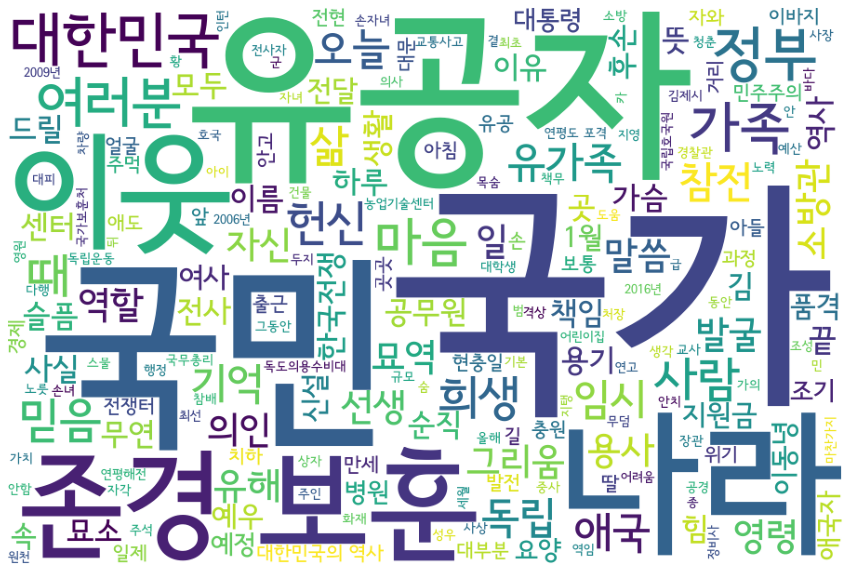

In [ ]:
plt.figure(figsize=(15, 20))
plt.axis('off')
plt.imshow(cloud)
plt.show()

## 2.6 같은 문장에 등장하는 단어의 관계도 그리기

같은 문장에 등장하는 단어는 서로 연관성이 높을 가능성이 있다.
* 예: '돌이켜 보면, 글로벌 경제위기에다 장기 경기 침체로 연속되는 위기에서 벗어나기 위해 매 순간마다 마음을 놓을 수 없었던 순간들이 많았던 것 같습니다.'
* '글로벌' '경제위기' '경기' '침체' '위기' -> 서로 연관성이 있는 단어들.

### 명사의 unique list 만들기

* `enumerate()` 사용법

```
choices = ['pizza', 'pasta', 'salad', 'nachos']
list(enumerate(choices))
=> [(0, 'pizza'), (1, 'pasta'), (2, 'salad'), (3, 'nachos')]
```

In [ ]:
unique_nouns = set()
for sent in tagged_sentences:    
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            unique_nouns.add(word)

unique_nouns = list(unique_nouns)
# unique_nouns
noun_index = {noun: i for i, noun in enumerate(unique_nouns)}
noun_index

{(0, '공수'): 0,
 (1, '나라'): 1,
 (2, '관심'): 2,
 (3, '제정'): 3,
 (4, '열사'): 4,
 (5, '출근'): 5,
 (6, '여사'): 6,
 (7, '미군'): 7,
 (8, '시행'): 8,
 (9, '범'): 9,
 (10, '자각'): 10,
 (11, '중국'): 11,
 (12, '생활'): 12,
 (13, '자신'): 13,
 (14, '신분'): 14,
 (15, '가치'): 15,
 (16, '참배'): 16,
 (17, '전쟁터'): 17,
 (18, '마음'): 18,
 (19, '묘역'): 19,
 (20, '대학생'): 20,
 (21, '최선'): 21,
 (22, '내년'): 22,
 (23, '건물'): 23,
 (24, '한국'): 24,
 (25, '원천'): 25,
 (26, '충원'): 26,
 (27, '보통'): 27,
 (28, '경제'): 28,
 (29, '단'): 29,
 (30, '전사자'): 30,
 (31, '다행'): 31,
 (32, '바다'): 32,
 (33, '이동녕'): 33,
 (34, '전달'): 34,
 (35, '역할'): 35,
 (36, '조금'): 36,
 (37, '개정'): 37,
 (38, '위기'): 38,
 (39, '2016년'): 39,
 (40, '추진'): 40,
 (41, '힘'): 41,
 (42, '활동'): 42,
 (43, '예우'): 43,
 (44, '농업기술센터'): 44,
 (45, '숨'): 45,
 (46, '안치'): 46,
 (47, '김제시'): 47,
 (48, '발전'): 48,
 (49, '비무장지대'): 49,
 (50, '후손'): 50,
 (51, '사상'): 51,
 (52, '순직'): 52,
 (53, '종'): 53,
 (54, '세월'): 54,
 (55, '동안'): 55,
 (56, '사실'): 56,
 (57, '전사'): 57,
 (58, '기억'): 58,
 (59, '

In [ ]:
noun_index['한국전쟁']

231

In [ ]:
word_token = ['파이썬', '자연어', '처리', '수업', '시간']
word2index = {}
for word in word_token:
    if word not in word2index.keys():
        word2index[word] = len(word2index)
print(word2index)

{'파이썬': 0, '자연어': 1, '처리': 2, '수업': 3, '시간': 4}


In [ ]:
word2index['자연어']

1

### 문장-단어 행렬 계산

In [ ]:
import numpy as np
occurs = np.zeros([len(tagged_sentences), len(unique_nouns)])
np.shape(occurs)

(158, 316)

In [ ]:
for i, sent in enumerate(tagged_sentences):
    for word, tag in sent:
        if tag in ['NNP', 'NNG']:
            index = noun_index[word]  # 명사가 있으면, 그 명사의 인덱스를 index에 저정
            occurs[i][index] = 1  # 문장 i의 index 자리에 1을 채워 넣는다.
            
occurs[100]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 1., 0., 0.

### 공존 단어 행렬 계산

`sentences = ['국민 여러분 안심하십시오.','서울은 안전합니다.','안심하고 서울을 지키세요 여러분.']` 

이 경우 occurs 는 다음과 같이 계산 됨.

```
# noun_index
{'안전': 0, '안심': 1, '서울': 2, '여러분': 3, '국민': 4}
# occurs
array([[0., 1., 0., 1., 1.],
       [1., 0., 1., 0., 0.],
       [0., 1., 1., 1., 0.]])
```

위의 결과를 다음과 같이 테이블로 만들 수 있음.

문장\단어 | 0-안전 | 1-안심 | 2-서울 | 3-여러분 | 4-국민
-- | -- | -- | -- | -- | --
(A)국민 여러분 안심하십시오 | 0 | 1 | 0 | 1 | 1
(B)서울은 안전합니다 | 1 | 0 | 1 | 0 | 0
(C)안심하고 서울을 지키세요 여러분 | 0 | 1 | 1 | 1 | 0


occurs의 전치행렬 `occurs.T`

```
# occurs.T
array([[0., 1., 0.],
       [1., 0., 1.],
       [0., 1., 1.],
       [1., 0., 1.],
       [1., 0., 0.]])
```

문장\단어 | (A)국민 여러분 안심하십시오 | (B)서울은 안전합니다 | (C)안심하고 서울을 지키세요 여러분
-- | -- | -- | --
0-안전 | 0 | 1 | 0 
1-안심 | 1 | 0 | 1 
2-서울 | 0 | 1 | 1 
3-여러분 | 1 | 0 | 1
4-국민 | 1 | 0 | 0


occurs.T와 occurs를 행렬의 곱셈으로 계산

![image](https://user-images.githubusercontent.com/7570803/48271937-d4af3880-e480-11e8-8a1d-a9756be7e260.png)

`occurs.T.dot(occurs)`는 각 문장에 대해, 단어 쌍들의 등장빈도를 곱해서 더하는 과정의 반복

예를 들어 '여러분'(단어**3**)과 '안심'(단어**1**)이라는 두 단어가 함께 등장하는지 알기 위해 co_occurs[**3**][**1**] (혹은 [1][3])를 계산하려면 

(문장0.단어3 * 문장0.단어1)+(문장1.단어3 * 문장1.단어1)+(문장2.단어3 * 문장2.단어1) 
= 1 * 1 + 0 * 0 + 1 * 1 = 2가 됨

![image](https://user-images.githubusercontent.com/7570803/48273054-6d46b800-e483-11e8-9b74-3af0576dfdeb.png)

이렇게 모든 항을 계산하면 co_occurence는 다음과 같이 계산 됨.

\ | 0-안전 | 1-안심 | 2-서울 | 3-여러분 | 4-국민
-- | -- | -- | -- | -- | --
0-안전 | 1 | 0 | 1 | 0 | 0
1-안심 | 0 | 2 | 1 | 2 | 1
2-서울 | 1 | 1 | 2 | 1 | 0
3-여러분 | 0 | 2 | 1 | 2 | 1
4-국민 | 0 | 1 | 0 | 1 | 1

In [ ]:
co_occurs = occurs.T.dot(occurs)

In [ ]:
co_occurs[0]

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### 연관 단어의 network graph 그리기

* `pip install networkx`

In [ ]:
import networkx as nx
graph = nx.Graph()

for i in range(len(unique_nouns)):
    for j in range(i + 1, len(unique_nouns)):
        if co_occurs[i][j] > 1:
            graph.add_edge(unique_nouns[i], unique_nouns[j])

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

Colab에서 한글을 제대로 보이게 하려면 다음의 코드를 실행시킨 후 Runtime -> Restart Runtime 을 실행

In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.7 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 155455 files and di

In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

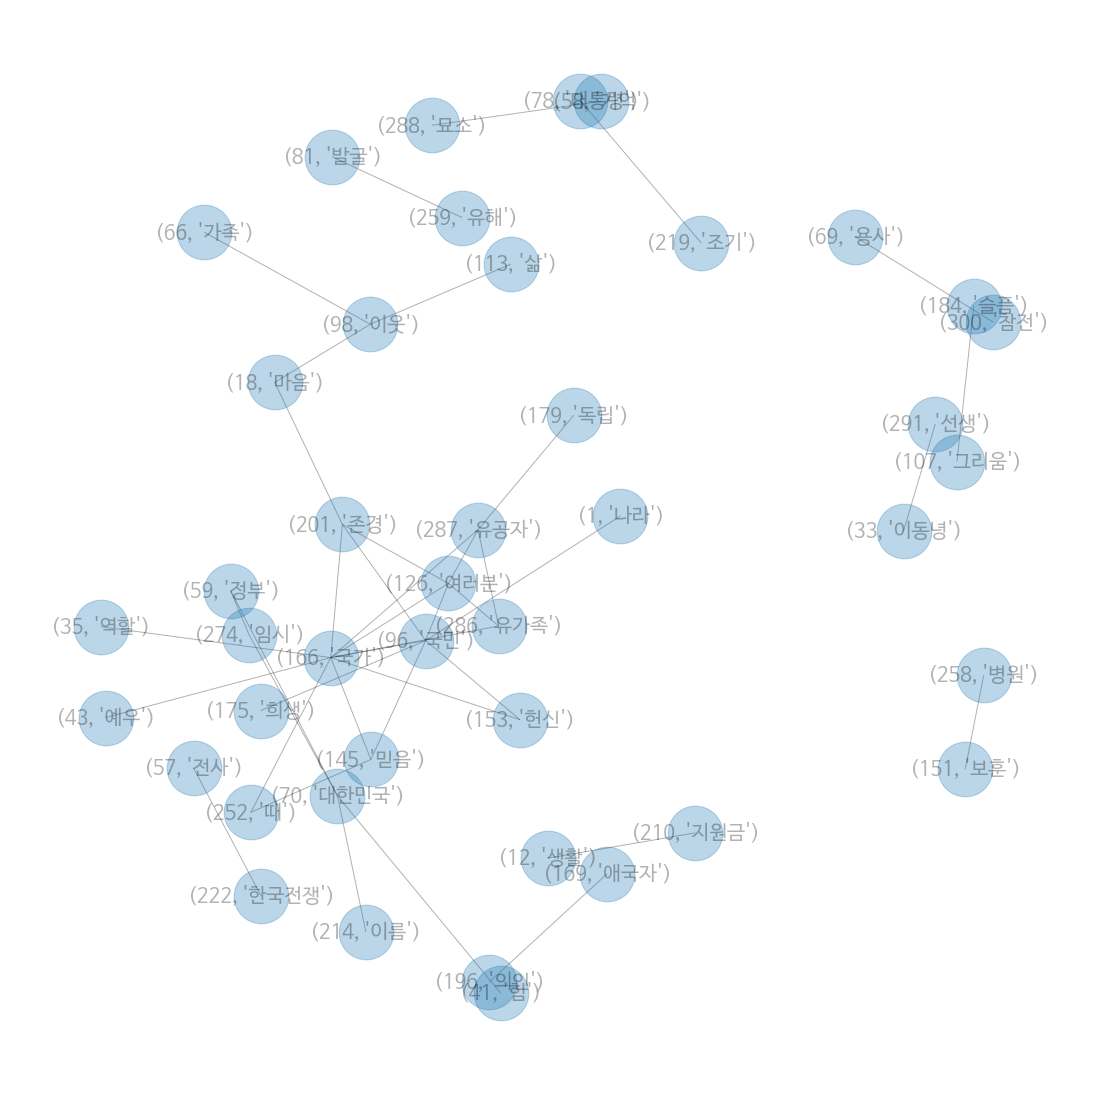

In [ ]:
plt.figure(figsize=(15, 15))
layout = nx.spring_layout(graph, k=.5)
nx.draw(graph, pos=layout, with_labels=True,
        font_size=20, font_family="NanumBarunGothic",
        alpha=0.3, node_size=3000)
plt.show()

이상으로 배운 기법을 활용하여 만든 웹사이트

https://monot.github.io/election-2020/index.html

## 2.7 실습 3

다음의 파일을 분석하여 WordCloud와 네트워크 그래프를 그려보자.
* Week8/lee-combined.txt
* Week8/hwang-combined.txt

### 파일 불러오기

In [ ]:
# 파일 선택
candidate = "lee"
# candidate = "hwang"

In [ ]:
# 파일 불러오기
with open('/content/drive/MyDrive/_SocialComp_2022-Lab/Week8/{}-combined.txt'.format(candidate), 'r') as f:
    lines = f.read().splitlines()
# lines

sentences = [line for line in lines if line != '']
# sentences

### 단어 전처리

In [ ]:
# 형태소 분석


In [ ]:
# Stopwords 지정
stop_words = ["말씀", "생각", "문제", "제가", "이번", "부분", "필요"]

In [ ]:
# 명사 리스트 추출


In [ ]:
# 단어의 빈도수를 계산하고 top5 단어의 리스트 생성


### Wordcloud 그리기

In [ ]:
# Wordcloud 그리기 (나눔명조 사용)


### 단어의 연결망 그리기

In [ ]:
# 유니크한 명사의 리스트


In [ ]:
# 단어 공존 테이블 생성


In [ ]:
# 그래프 생성


In [ ]:
# 그래프 그리기
